In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [27]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [28]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [29]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [30]:
# reflect an existing database into a new model
Base = automap_base() 
# reflect the tables
Base.prepare(autoload_with=engine)

In [31]:
# View all of the classes that automap found
table_names = Base.classes.keys()
print(table_names)

['measurement', 'station']


In [32]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [33]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [34]:
# Find the most recent date in the data set.
most_recent_date = session.query(func.max(Measurement.date)).scalar()

print(most_recent_date)

2017-08-23


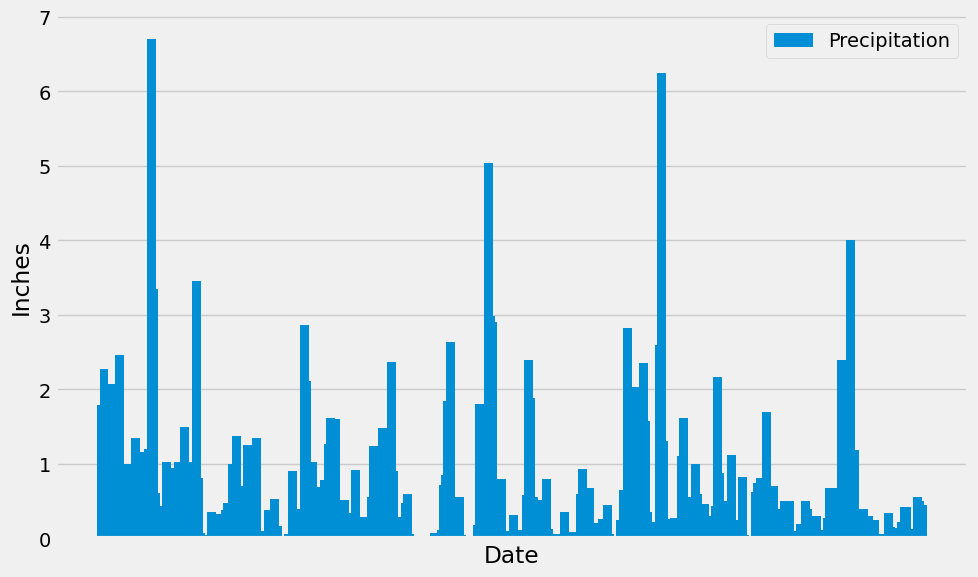

In [35]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.
most_recent_date = session.query(func.max(Measurement.date)).scalar()
most_recent_date = pd.to_datetime(most_recent_date)
# Starting from the most recent data point in the database. 
one_year_ago = most_recent_date - pd.DateOffset(years=1)
one_year_ago_str = one_year_ago.strftime('%Y-%m-%d')
# Calculate the date one year from the last date in data set.
# Calculate the date one year (365 days) from the most recent date
# Perform a query to retrieve the data and precipitation scores
# Save the query results as a Pandas DataFrame. Explicitly set the column names
precipitation_data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= one_year_ago_str).all()
df = pd.DataFrame(precipitation_data, columns=["Date", "Precipitation"])
# Sort the dataframe by date
df = df.sort_values("Date")
# Use Pandas Plotting with Matplotlib to plot the data
plt.figure(figsize=(10, 6))
plt.bar(df["Date"], df["Precipitation"], width=4, label="Precipitation")
plt.xlabel("Date")
plt.ylabel("Inches")
plt.xticks([])
plt.legend()
plt.tight_layout()
plt.show()

In [47]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary_stats = df["Precipitation"].describe()
summary_df = pd.DataFrame(summary_stats)

# Print the summary statistics
summary_df

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [15]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(func.count(Station.station)).scalar()

# Print the total number of stations
print(total_stations)

9


In [17]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
station_activity = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
station_activity

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [21]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station = station_activity[0][0]  # Assuming you've already obtained the station_activity list

# Calculate the lowest, highest, and average temperature for the most active station
temperature_stats = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).filter(Measurement.station == most_active_station).all()

# Extract and print the results
lowest_temp, highest_temp, avg_temp = temperature_stats[0]
lowest_temp, highest_temp, avg_temp


(54.0, 85.0, 71.66378066378067)

In [48]:
print(most_active_station)

USC00519281


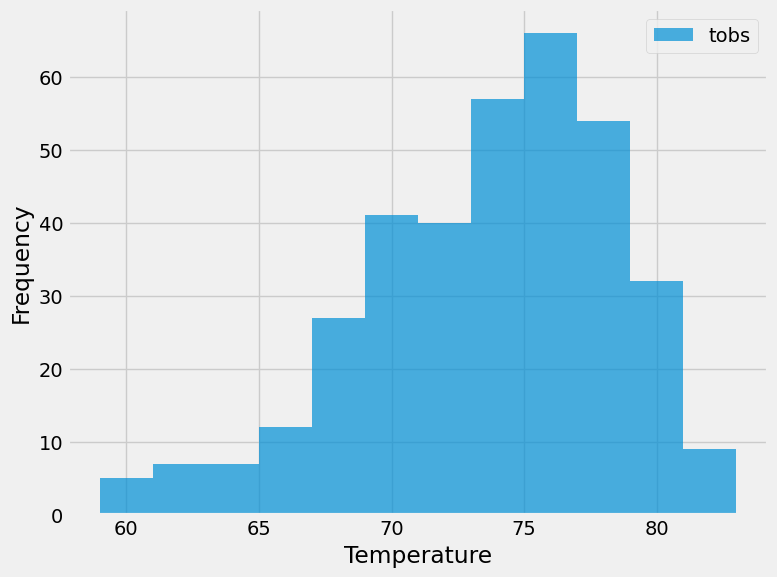

In [71]:
# Using the most active station id
most_active_station = 'USC00519281'

# Find the most recent date for the most active station
most_recent_date = session.query(func.max(Measurement.date)).\
    filter(Measurement.station == most_active_station).scalar()

most_recent_date = pd.to_datetime(most_recent_date)
one_year_ago = most_recent_date - pd.DateOffset(years=1)

one_year_ago_str = one_year_ago.strftime('%Y-%m-%d')

temperature_data = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.station == most_active_station).\
    filter(Measurement.date >= one_year_ago_str).all()

# Create a Pandas DataFrame from the query results
df = pd.DataFrame(temperature_data, columns=["Date", "Temperature (F)"])

# Plot the histogram
plt.figure(figsize=(8, 6))
plt.hist(df["Temperature (F)"], bins=12, alpha=0.7)
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.legend(["tobs"])
plt.tight_layout()
plt.show()

# Close Session

In [16]:
# Close Session
session.close()